# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns

sns.set(style='dark', font_scale=1.4)

# First Look at the Data

## Loading in the Data

In [2]:
train = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

print("training set shape:",train.shape)
print("testing set shape:",test.shape)

training set shape: (8693, 14)
testing set shape: (4277, 13)


In [3]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Feature descriptions:

* **PassengerId** - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* **HomePlanet** - The planet the passenger departed from, typically their planet of permanent residence.
* **CryoSleep** - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* **Cabin** - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* **Destination** - The planet the passenger will be debarking to.
* **Age** - The age of the passenger.
* **VIP** - Whether the passenger has paid for special VIP service during the voyage.
* **RoomService, FoodCourt, ShoppingMall, Spa, VRDeck** - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* **Name** - The first and last names of the passenger.
* **Transported** - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



## Missing Data

### Training Set

<AxesSubplot:>

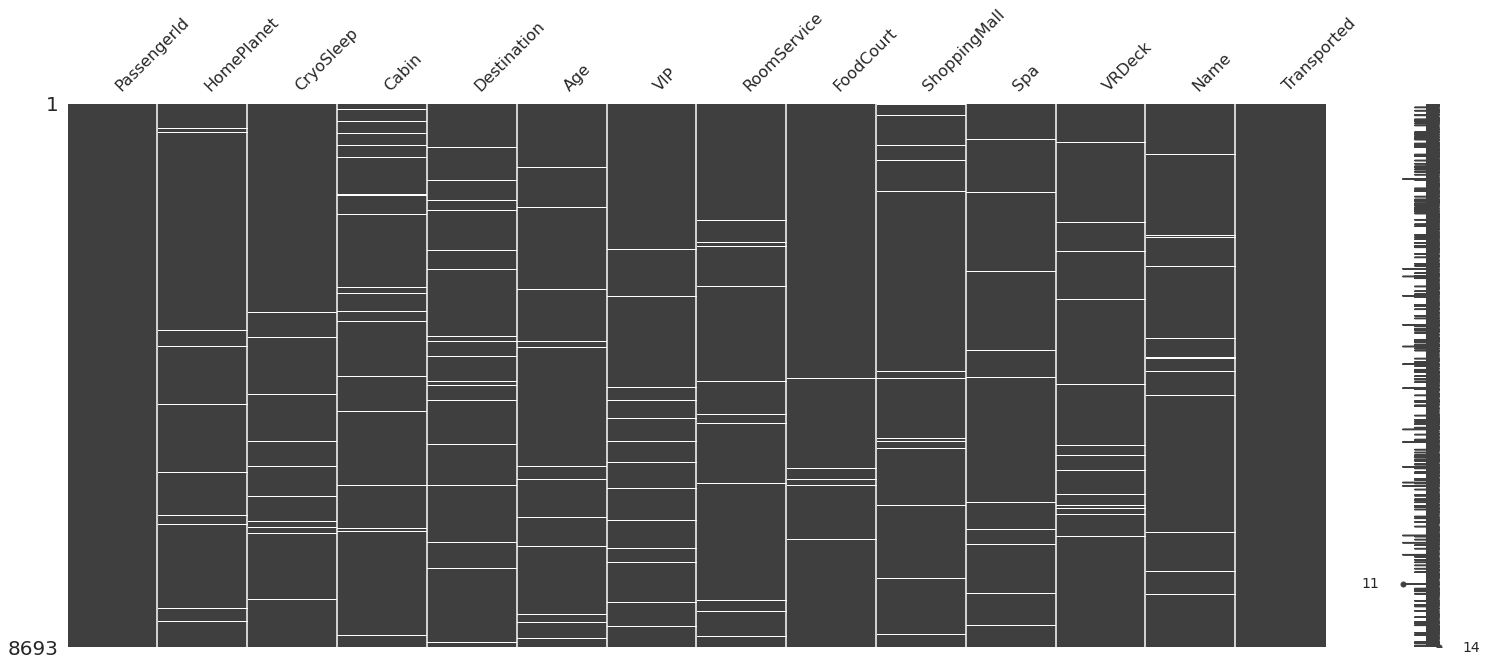

In [4]:
### visualizing the missing training data with missingno
msno.matrix(train)

In [5]:
print("missing data in the training set:")
print(train.isna().sum())

missing data in the training set:
PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


### Testing Set

<AxesSubplot:>

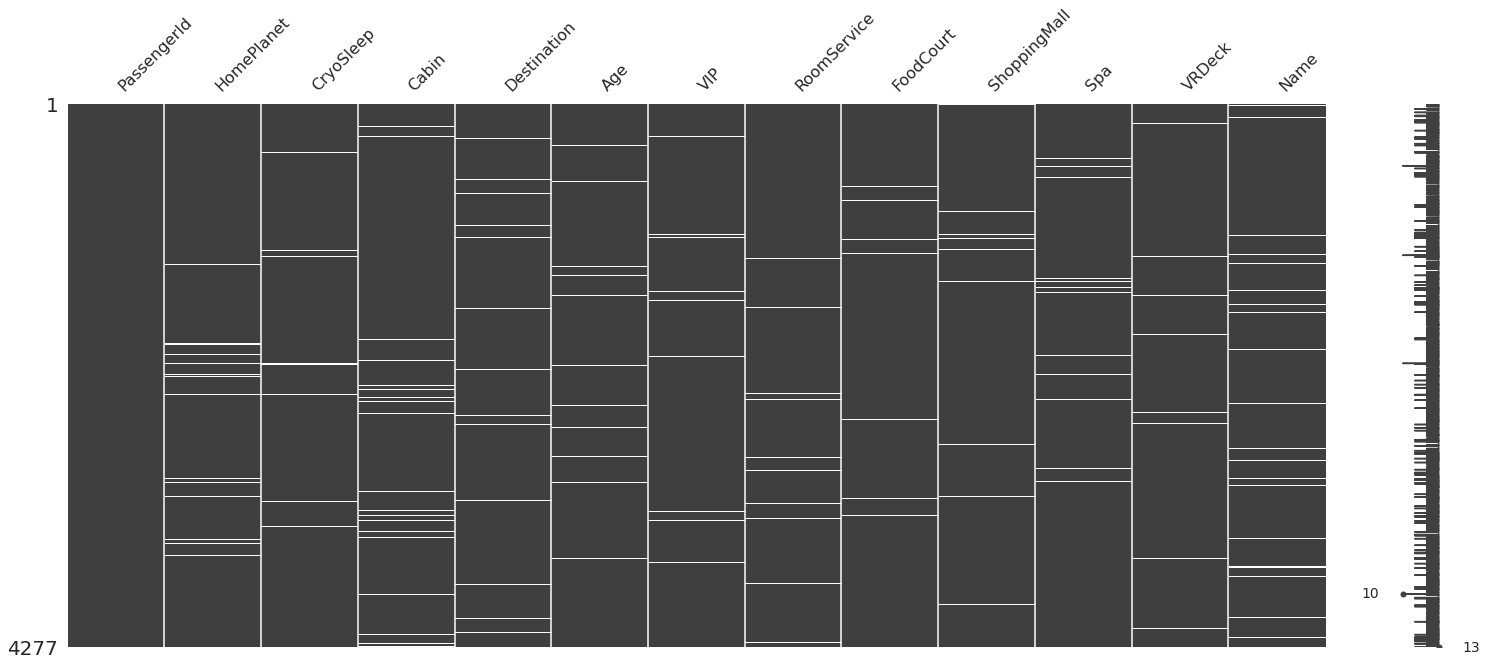

In [6]:
### visualizing the missing testing data with missingno
msno.matrix(test)

In [7]:
print("missing data in the testing set:")
print(test.isna().sum())

missing data in the testing set:
PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64


## Duplicate Data

In [8]:
print("duplicate training data:",train.duplicated().sum())
print("duplicate testing data:",test.duplicated().sum())

duplicate training data: 0
duplicate testing data: 0


## Data Types

In [9]:
test.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

# Data Exploration

Text(0.5, 1.0, 'Target Distribution')

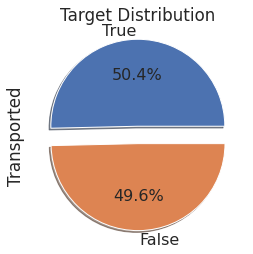

In [10]:
### Pie plot
train['Transported'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target Distribution")

In [11]:
### how balanced are the transported/not transported groups?
train.groupby('Transported').agg("count")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
Transported,,,,,,,,,,,,,
False,4315,4217,4204,4216,4225,4226,4216,4217,4231,4221,4223,4225,4216
True,4378,4275,4272,4278,4286,4288,4274,4295,4279,4264,4287,4280,4277


According to the table above, we can see that each of the original features is evenly split between whether or not the passenger was Transported. This is telling us that we'll need to dive into each of the features individually and that we'll probably also need to do some feature engineering. In order to stay more organized, I'll split up these breakdowns by type of data: categorical, continuous, and qualitative.

## Categorical

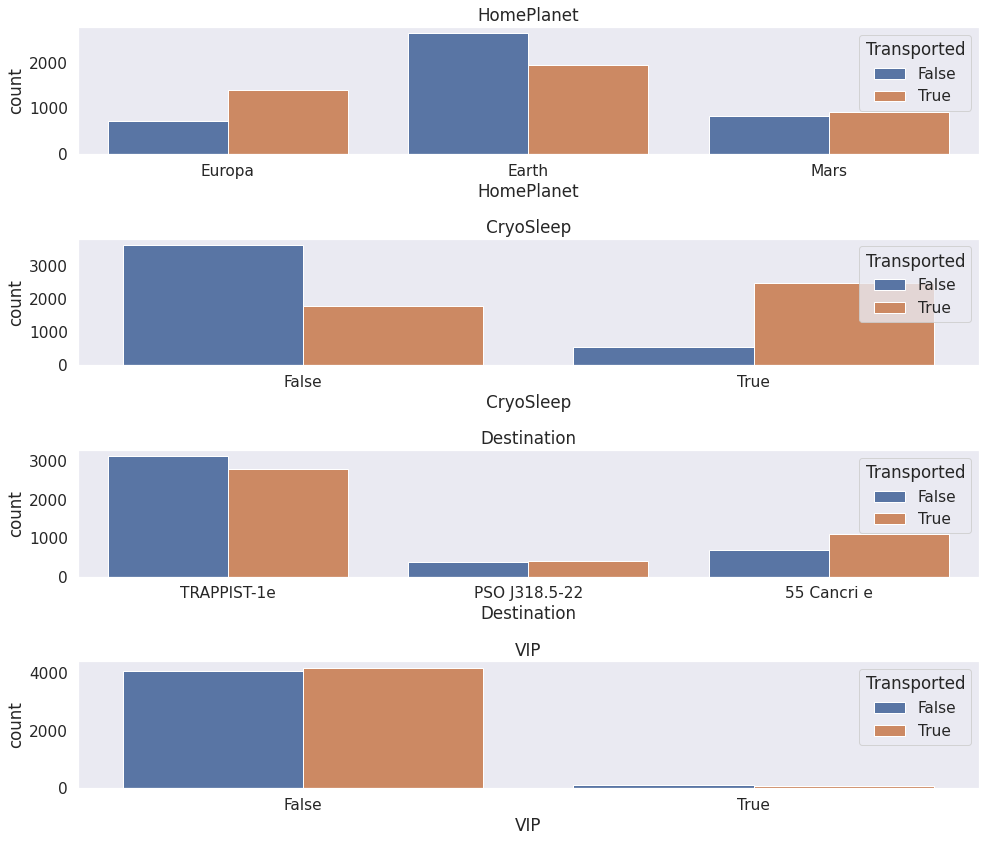

In [12]:
### The categorical features
categorical = ["HomePlanet", "CryoSleep", "Destination", "VIP"]

### Plot categorical features
fig=plt.figure(figsize=(14,12))
for i, var_name in enumerate(categorical):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

**Learnings**
* **HomePlanet:** People from Europa were much more likely to be transported. People from earth were much more likely to not be transported. People from Mars were slightly more likely to be transported.
* **CryoSleep:** People who were in CryoSleep were much more likely to be transported than those notin CryoSleep.
* **Destination:** Those traveling to TRAPPIST-1e were slightly less likely to be Transported. Those traveling to 55 Cancri e were slightly more likely to be transported. People traveling to PSO J318.5-22 were almost split evenly.
* **VIP:** People with and without VIP were almost equally transported.

**Insights**
* because VIP is so evenly split, it could result in overfitting

## Continuous

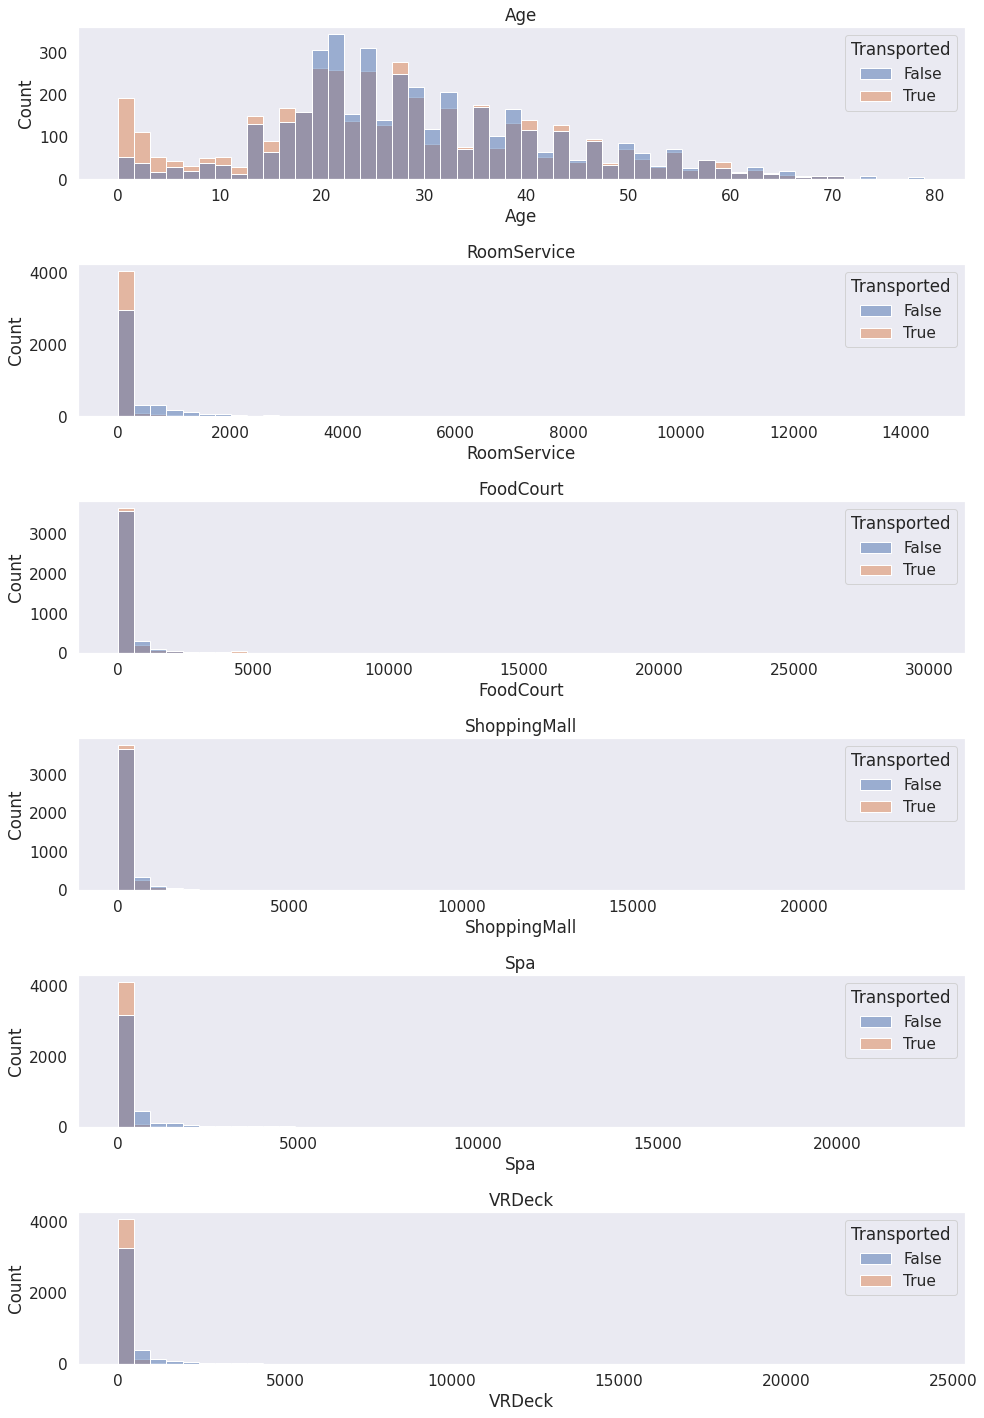

In [13]:
### The continuous features
continuous = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]

### Plot continuous features
fig=plt.figure(figsize=(14,20))
for i, var_name in enumerate(continuous):
    ax=fig.add_subplot(6,1,i+1)
    sns.histplot(data=train, x=var_name, bins=50, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

**Learnings**
* **Age:** 0-18 was much more likely to be transported. 42 and up were split pretty evenly between transported and not transported. Ages in between those two buckets were much more likely to not be transferred.
* **RoomService:** Those that did not order room service were much more likely to be transported than those who did not order room service.
* **FoodCourt:** Spending money at the food court didn't have a strong impact on whether someone was transported.
* **ShoppingMall:** Spending money at the shopping mall didn't have a strong impact on whether someone was transported.
* **Spa:** Those that did not spend money at the spa were much more likely to be transported than those who did not order room service.
* **VR Deck:** Those that did not spend money at the VRDeck were much more likely to be transported than those who did not order room service.

**Insights**
* Age can be bucketed into several different bins (0-5: baby, 6-12: adolescent, 13-18: teen, 19-34: adult, 35-50: middleage, 51>: elderly


## Qualitative

The qualitative data is going to be a little bit more nuanced because we'll need to do some feature engineering in order to get the most out of it. So, for the mean time, we're going to skip to the Feature Engineering section.

# Feature Engineering

## Filling Missing Values

Before we start engineering features, let's now deal with missing values. For the sake of time, we can just use Sklearn's SimpleImputer. SimpleImputer is a simple algorithm which replaces missing values using descriptive statistic.

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
### creating a function to fill missing data in order to save space
def fill_missing(data):
    ### Using SimpleImputer to fill missing values

    ### HomePlanet
    imp = SimpleImputer(strategy="most_frequent")
    imp.fit_transform(data[['HomePlanet']])
    data['HomePlanet'] = imp.fit_transform(data[['HomePlanet']])

    ### CryoSleep
    imp = SimpleImputer(strategy="most_frequent")
    imp.fit_transform(data[['CryoSleep']])
    data['CryoSleep'] = imp.fit_transform(data[['CryoSleep']])

    #### Destination
    imp = SimpleImputer(strategy="most_frequent")
    imp.fit_transform(data[['Destination']])
    data['Destination'] = imp.fit_transform(data[['Destination']])

    ### Age
    imp = SimpleImputer(strategy="median") #
    imp.fit_transform(data[['Age']])
    data['Age']=imp.fit_transform(data[['Age']])

    ### VIP
    imp = SimpleImputer(strategy="most_frequent")
    imp.fit_transform(data[['VIP']])
    data['VIP'] = imp.fit_transform(data[['VIP']])

    ### RoomService
    imp = SimpleImputer(strategy='constant', fill_value=0)
    data['RoomService']=imp.fit_transform(data[['RoomService']])

    ### FoodCourt
    imp = SimpleImputer(strategy='constant', fill_value=0)
    data['FoodCourt']=imp.fit_transform(data[['FoodCourt']])

    ### ShoppingMall
    imp = SimpleImputer(strategy='constant', fill_value=0)
    data['ShoppingMall']=imp.fit_transform(data[['ShoppingMall']])

    ### Spa
    imp = SimpleImputer(strategy='constant', fill_value=0)
    data['Spa']=imp.fit_transform(data[['Spa']])

    ### VRDeck
    imp = SimpleImputer(strategy='constant', fill_value=0)
    data['VRDeck']=imp.fit_transform(data[['VRDeck']])

    ### I'm going to just fill Cabin/Name Nan values with Unknown. The assumption here, is that the passengers that don't
    ### have this information available were either oversights, stowaways, or something more sinister (LOL)
    ### Cabin
    data['Cabin'] = data['Cabin'].fillna('Unknown')

    ### Name
    data['Name'] = data['Name'].fillna('Unknown')
    
    return data

In [16]:
train = fill_missing(train)
test = fill_missing(test)

<AxesSubplot:>

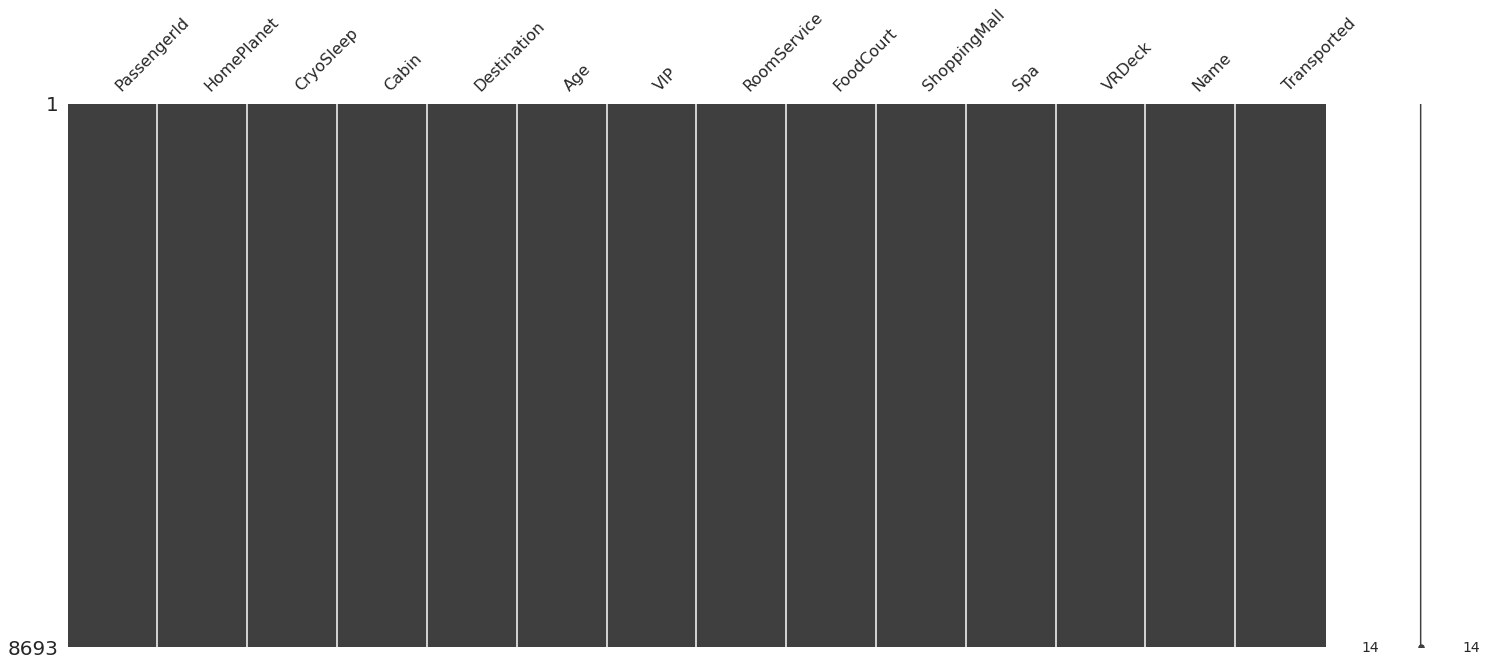

In [17]:
### visualizing the missing training data with missingno
msno.matrix(train)

<AxesSubplot:>

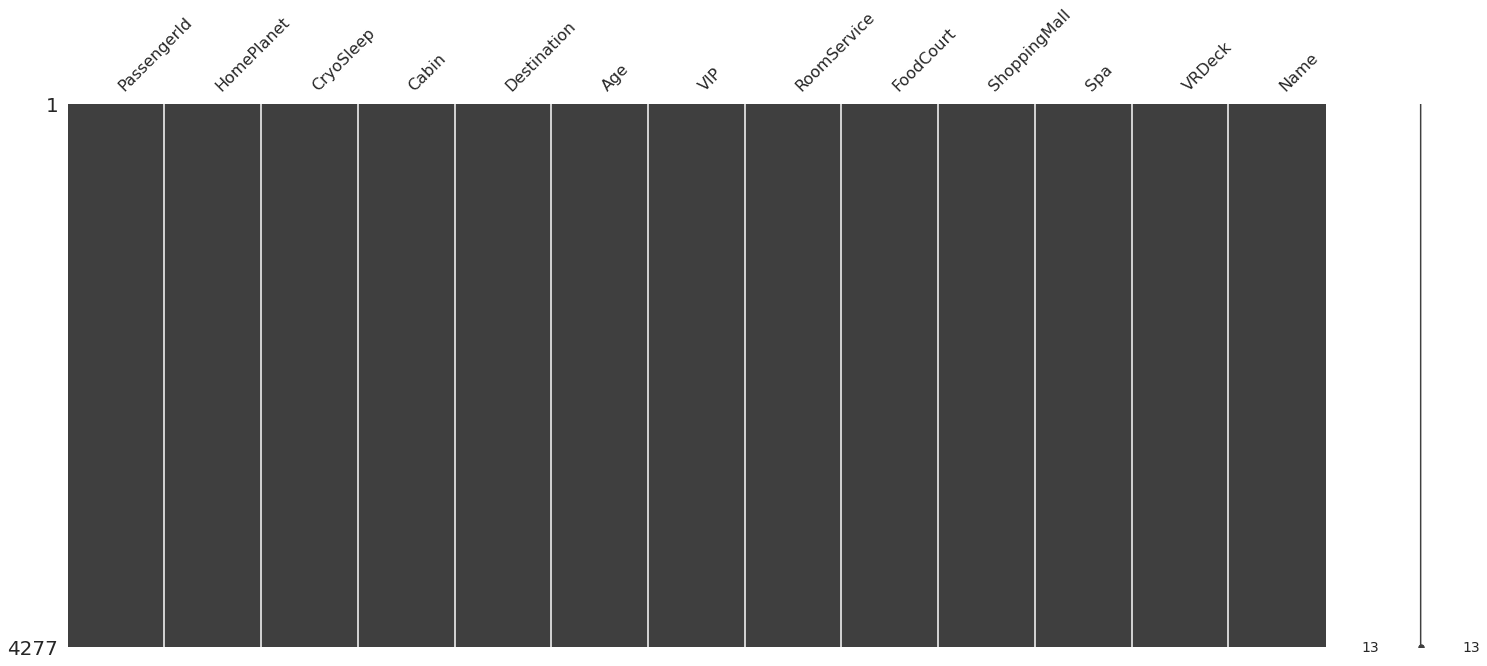

In [18]:
### visualizing the missing testing data with missingno
msno.matrix(test)

## Feature Engineering

Let's create a few features based on our earlier insigths. We'll split the PassengerId, split the Cabin, create a TotalSpend column, and put Age into categories.

In [19]:
### creating a function to do the feature engineering in order to save space
def feature_engineer(data):
    ### Splitting PassengerId (gggg_dd) into two separate columns
    data[["G_Passenger", 'N_Passenger']] = data["PassengerId"].str.split('_', expand=True).astype('int')

    ### Separating Deck/Num/Side from the Cabin Feature
    data[['Deck','Num','Side']] = data['Cabin'].str.split('/',expand=True)
    data.loc[data['Num'].isnull(), 'Num'] = "Unknown"
    data.loc[data['Side'].isnull(), 'Side'] = "Unknown"

    ### Total spend column
    data['TotalSpend'] = data.loc[0:len(data),'RoomService':'VRDeck'].sum(axis=1)

    ### AgeCat
    data['Age'] = data['Age'].astype(int)
    data['AgeCat'] = pd.cut(data['Age'],bins=[-1, 5, 12, 18, 35, 50, 200], labels=['0-5','6-12','13-18','19-35','36-50','51+'])
    
    data = data.drop(['PassengerId','Cabin','Name'],axis=1)
    
    return data

In [20]:
train = feature_engineer(train)
test = feature_engineer(test)

In [21]:
train.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
G_Passenger     0
N_Passenger     0
Deck            0
Num             0
Side            0
TotalSpend      0
AgeCat          0
dtype: int64

In [22]:
test.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
G_Passenger     0
N_Passenger     0
Deck            0
Num             0
Side            0
TotalSpend      0
AgeCat          0
dtype: int64

Now that we've dealt with null values and have engineered some new features, it's time to encode these categorical columns. The easiest way to do this is with Sklearn's Label Encoder.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
### using the fit_transform method, we can encode the entire table in one pass
enc_train = train.apply(LabelEncoder().fit_transform)
enc_test = test.apply(LabelEncoder().fit_transform)

# CatBoost!

I'm choosing to use a Boost algorithm (spefically Gradient Boosting) in order to predict whether the passengers were Transported. We're using Boosting because it's easy, is able to reduce bias through it's iterative process, and it's computationaly efficient (which won't actually matter too much for our dataset because it's not terribly large). One important thing to watch out for, however, is overfitting.

In [25]:
# pip install catboost

## Training the Algorithm

In [26]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

In [27]:
model = CatBoostClassifier(iterations=5000,
                           eval_metric='Accuracy',
                           verbose=0)

In [28]:
x = enc_train.drop('Transported',axis=1)
y = enc_train['Transported']

model.fit(x,y)

In [29]:
pred = model.predict(x)
print(accuracy_score(y.values,pred))

0.8900264580697113


## Testing the Algorithm

In [30]:
y_pred = model.predict(enc_test)
final_prediction = pd.DataFrame({'Transported':y_pred.astype(bool)},index=enc_test.index)

Text(0.5, 1.0, 'Prediction Distribution')

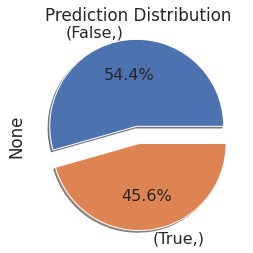

In [31]:
### Pie plot
final_prediction.value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Prediction Distribution")

The final prediction has an error of roughly 11%. This high-level of accuracy could be improved with more feature engineering, finding the optimal parameters, and training the model with more data. For a quick prediction, though, CatBoosting did an excellent job.

# Final Prediction

In [32]:
test = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")

In [33]:
final = pd.concat([test['PassengerId'],final_prediction],axis=1)
final

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [34]:
final.to_csv('submission.csv', index=None)